#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Temas 6 y 7: Identificación de anomalias y ManiFold learning
##### Alumno: Ibarra Ramírez Sergio </font>

### Detección de anomalias 

Existen muchos métodos más para encontrar valores atípicos en conjuntos de datos, la tarea consiste en buscar al menos otros dos y presentarlos con la idea intuitiva básica y un ejemplo en un documento que se entregará en Moodle

##### Método Z-Score para detección de valores atípicos 

Teoría matemática: El método Z-Score detecta valores atípicos calculando el número de desviaciones estándar que un punto de datos se encuentra lejos de la media. Los puntos de datos que se encuentran fuera de un umbral especificado (a menudo 2 o 3 desviaciones estándar) se consideran valores atípicos.

Ejemplo:

Si la media de una población es 100 y la desviación estándar es 15, entonces un punto de datos con un valor de 120 se considera un valor atípico, ya que se encuentra 2 desviaciones estándar por encima de la media.

Formula:

La fórmula para calcular el método Z-Score es:

z = (x - μ) / σ

donde:<br>
z = el valor Z-Score <br>
x = el valor del punto de datos<br>
μ = la media de la población<br>
σ = la desviación estándar de la población

Ejemplo de Implementación del método Z-Score para detección de valores atípicos 

In [1]:
import numpy as np

def find_anomalies_zscore(data, threshold=3):
    anomalies = []
    data_mean = np.mean(data)
    data_std = np.std(data)
    z_scores = [(d - data_mean) / data_std for d in data]
    for i, z in enumerate(z_scores):
        if np.abs(z) > threshold:
            anomalies.append(data[i])
    return anomalies

##### Método Modified Z-Score (MAD) para detección de valores atípicos 

Teoría matemática: El método MAD (Modificación del método Z-Score), también conocido como el método de la desviación absoluta mediana (MAD), utiliza la mediana y la desviación absoluta mediana para detectar valores atípicos. Mide la desviación de cada punto de datos de la mediana en términos de la desviación absoluta mediana. Los puntos de datos que se encuentran fuera de un umbral especificado (a menudo 2 o 3 MADs) se consideran valores atípicos.

La fórmula para calcular el método Modified Z-Score es: <br>

z = 0.6745 * (x - x̄) / MAD

donde: <br>

z = el valor Modified Z-Score <br>
x = el valor del punto de datos <br>
x̄ = la mediana de la población <br>
MAD = la desviación absoluta mediana de la población<br> 
El Modified Z-Score se calcula de manera similar al Z-Score, pero en lugar de usar la media de la población, se usa la mediana. Esto hace que el Modified Z-Score sea menos sensible a los valores atípicos, lo que lo hace más robusto.

Ejemplo de Implementación del método Modified Z-Score (MAD) para detección de valores atípicos 

In [2]:
import numpy as np

def find_anomalies_mad(data, threshold=3):
    anomalies = []
    data_median = np.median(data)
    median_abs_deviation = np.median(np.abs(data - data_median))
    modified_z_scores = [0.6745 * (d - data_median) / median_abs_deviation for d in data]
    for i, z in enumerate(modified_z_scores):
        if np.abs(z) > threshold:
            anomalies.append(data[i])
    return anomalies

#### Aplicación de algoritmos de detección de anomalias 

Aplique al menos tres de los métodos vistos en la sesión o de los provistos por usted a alguno de los conjuntos de datos de las prácticas anteriores

In [5]:
import pandas as pd 

url = 'https://bit.ly/2COHM14'
data_para_anomalies = pd.read_csv(url)
data_para_anomalies.head(4)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788


Ejemplo de implementación del algoritmo Z-score para detección de anomalias con la data de Groseries (Fresh)

In [9]:
data_para_anomalies['Fresh'].describe()

count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
25%        3127.750000
50%        8504.000000
75%       16933.750000
max      112151.000000
Name: Fresh, dtype: float64

In [6]:
find_anomalies_zscore(data_para_anomalies['Fresh'], threshold=3)

[56159, 56082, 76237, 112151, 56083, 53205, 68951]

Ejemplo de implementación del algoritmo Modified Z-score (MAD)  para detección de anomalias con la data de Groseries (Fresh)

In [7]:
find_anomalies_mad(data_para_anomalies['Fresh'], threshold=3)

[43088,
 56159,
 44466,
 40721,
 35942,
 43265,
 56082,
 36050,
 76237,
 42312,
 37036,
 45640,
 112151,
 36847,
 47493,
 56083,
 53205,
 36817,
 49063,
 68951,
 40254,
 42786,
 39679,
 38793,
 39228]

Se observa como el método Modified Z-score basado en la mediana, es capáz de detéctar más valores atípicos que el Z-socre 'normal' 

Ejemplo de implementación del algoritmo Rango Interquartilico  para detección de anomalias con la data de Groseries (Fresh)

In [12]:
import numpy as np
from scipy.stats import iqr

def find_anomalies_iqr(data, k=1.5):
    anomalies = []
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr_value = iqr(data)
    lower_bound = q1 - k * iqr_value
    upper_bound = q3 + k * iqr_value
    for d in data:
        if d < lower_bound or d > upper_bound:
            anomalies.append(d)
    return anomalies

In [13]:
find_anomalies_iqr(data_para_anomalies['Fresh'])

[43088,
 56159,
 44466,
 40721,
 43265,
 56082,
 76237,
 42312,
 45640,
 112151,
 47493,
 56083,
 53205,
 49063,
 68951,
 40254,
 42786,
 39679,
 38793,
 39228]

Se observa como el algoritmo de IQR otorga resultados similares al algoritmo Modified Z-score 

### Técnicas de ManifoldLearning 

Utiliza el conjunto de datos load_digits que consta de 1797 muestras que representan números con 64 características de brillo en cada pixel

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [19]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

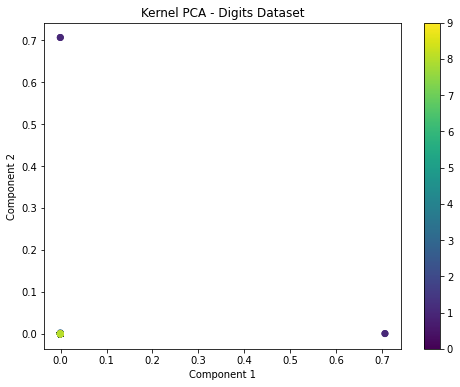

In [22]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Preprocess the data by scaling the features
scaler = StandardScaler()
scaled_digits = scaler.fit_transform(digits.data)

# Apply Kernel PCA for dimensionality reduction
kpca = KernelPCA(n_components=16, kernel='rbf', gamma=15)
kpca_digits = kpca.fit_transform(scaled_digits)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(kpca_digits[:, 0], kpca_digits[:, 1], c=digits.target, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Kernel PCA - Digits Dataset')
plt.colorbar()
plt.show()


Aplica al menos dos técnicas de Manifold Learning revisadas para reducir su dimensionalidad, verificar la exactitud de los modelos con ayuda del accuracy_score

Ejemplo de uso del Kernel  rbf 

In [24]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()

# Preprocess the data by scaling the features
scaler = StandardScaler()
scaled_digits = scaler.fit_transform(digits.data)

# Apply Kernel PCA for dimensionality reduction
kpca = KernelPCA(n_components=16, kernel='rbf', gamma=15)
kpca_digits = kpca.fit_transform(scaled_digits)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(kpca_digits, digits.target, test_size=0.2, random_state=42)

# Train a classification model on the transformed data
clf = SVC()
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classification model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.07777777777777778


Ahora se usará el Kernel Sigmoid 

In [25]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()

# Preprocess the data by scaling the features
scaler = StandardScaler()
scaled_digits = scaler.fit_transform(digits.data)

# Apply Kernel PCA for dimensionality reduction with a different kernel and gamma
kpca = KernelPCA(n_components=16, kernel='sigmoid', gamma=0.001)
kpca_digits = kpca.fit_transform(scaled_digits)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(kpca_digits, digits.target, test_size=0.2, random_state=42)

# Train a classification model on the transformed data
clf = SVC()
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classification model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9833333333333333


Es claro como para el caso de digits, se pudo reducor el número de componentes de 64 a 16 y usando el kernel sigmoide obtener un accuracy de casi 99% 